In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [3]:
df = pd.read_csv("/home/user/Downloads/student_performance.csv")
df.head()


,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2


In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
count,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.00000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000
mean,19.987431,80.194316,1.104406,0.594158,0.905806,0.925516,0.551953,23.532172,1.515461,9.891952,0.60587,74.502535,70.346926,0.709062,1.304363,1.447904
std,5.890637,11.472181,0.697362,0.491072,0.695896,0.262566,0.497311,3.514293,1.112941,6.112801,0.48868,14.632177,17.688113,0.454211,0.785383,1.121550
min,5.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.00000,50.000000,40.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,1.000000,5.000000,0.00000,62.000000,55.000000,0.000000,1.000000,0.000000
50%,20.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,2.000000,10.000000,1.00000,74.000000,70.000000,1.000000,2.000000,1.000000
75%,24.000000,90.000000,2.000000,1.000000,1.000000,1.000000,1.000000,27.000000,3.000000,15.000000,1.00000,87.000000,86.000000,1.000000,2.000000,2.000000
max,44.000000,100.000000,2.000000,1.000000,2.000000,1.000000,1.000000,29.000000,3.000000,20.000000,1.00000,100.000000,100.000000,1.000000,2.000000,3.000000


In [7]:
#Checking missing and duplicated values
print(df.isnull().sum())
print(df.duplicated().sum())


StudyHours              0
Attendance              0
Resources               0
Extracurricular         0
Motivation              0
Internet                0
Gender                  0
Age                     0
LearningStyle           0
OnlineCourses           0
Discussions             0
AssignmentCompletion    0
ExamScore               0
EduTech                 0
StressLevel             0
FinalGrade              0
dtype: int64
1534


In [8]:
#Dropping dupicate values
df.drop_duplicates(inplace=True)


In [9]:
#Rename columns for clarity
df.columns = df.columns.str.lower()


In [10]:
#Overall Performance score
df["overall_score"] = (
    df["examscore"] * 0.5 +
    df["assignmentcompletion"] * 0.3 +
    df["attendance"] * 0.2
)


In [11]:
#Career confidence level
def confidence_level(score):
    if score >= 75:
        return "High"
    elif score >= 50:
        return "Medium"
    else:
        return "Low"

df["career_confidence"] = df["overall_score"].apply(confidence_level)
df["career_confidence"].value_counts()


career_confidence
Medium    6792
High      5658
Low         19
Name: count, dtype: int64

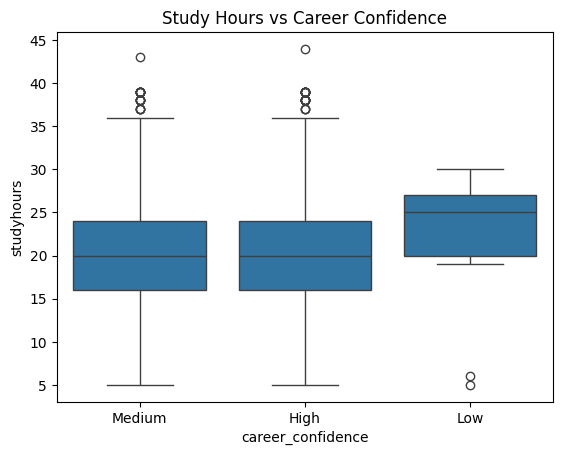

In [12]:
#Study hours vs Career Confidence
sns.boxplot(x="career_confidence", y="studyhours", data=df)
plt.title("Study Hours vs Career Confidence")
plt.show()


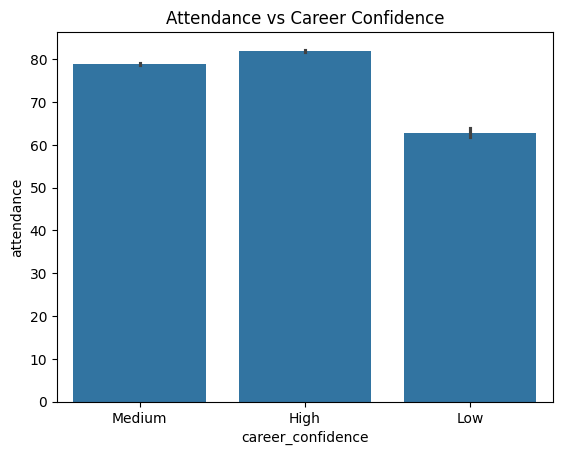

In [13]:
#Attendence versus confidence
sns.barplot(x="career_confidence", y="attendance", data=df)
plt.title("Attendance vs Career Confidence")
plt.show()


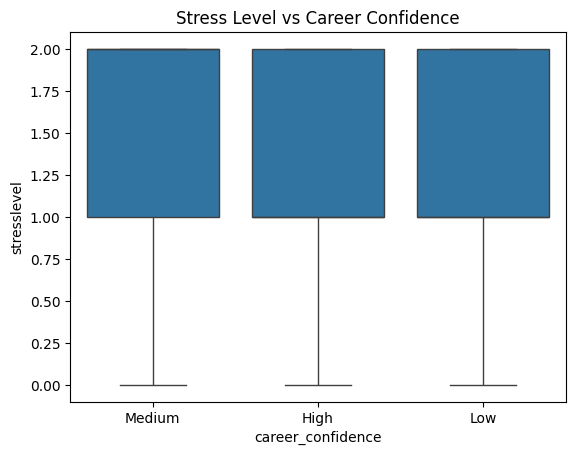

In [14]:
#Stress level impact
sns.boxplot(x="career_confidence", y="stresslevel", data=df)
plt.title("Stress Level vs Career Confidence")
plt.show()


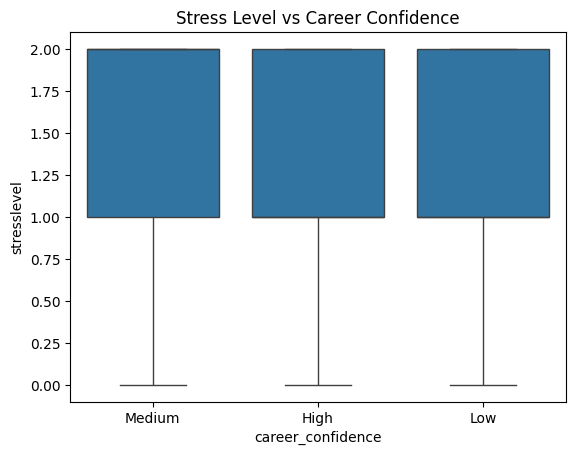

In [15]:
#Online courses effect
sns.boxplot(x="career_confidence", y="stresslevel", data=df)
plt.title("Stress Level vs Career Confidence")
plt.show()


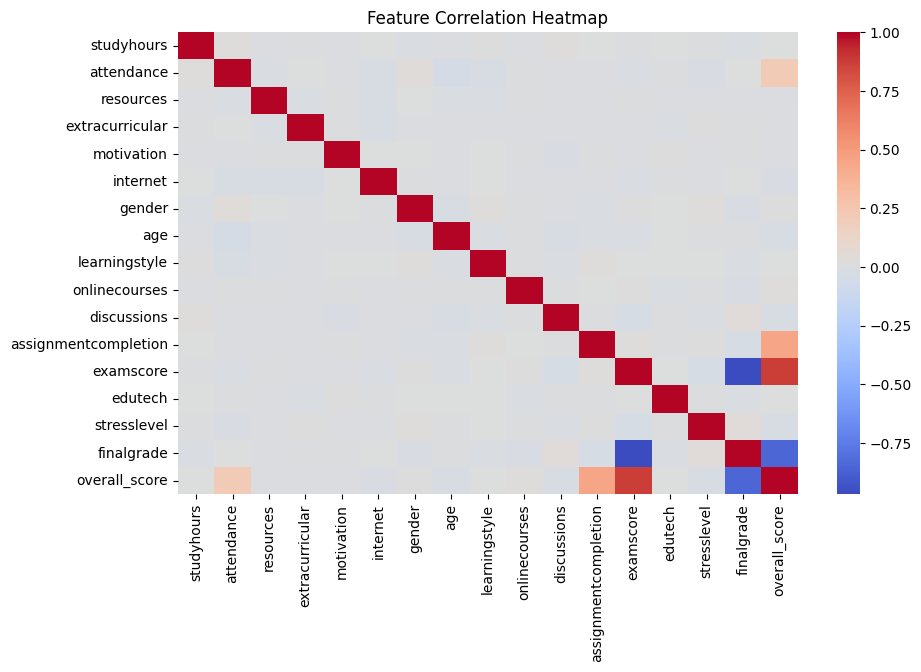

In [17]:
# Correlation heatmap (NUMERIC FEATURES ONLY)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
#Normalized the key features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_for_confusion = [
    "stresslevel",
    "motivation",
    "studyhours",
    "attendance",
    "assignmentcompletion",
    "onlinecourses"
]

df_scaled = pd.DataFrame(
    scaler.fit_transform(df[features_for_confusion]),
    columns=features_for_confusion
)


In [19]:
#Build career confusion index
df["career_confusion_index"] = (
    df_scaled["stresslevel"] * 0.30 +
    (1 - df_scaled["motivation"]) * 0.20 +
    (1 - df_scaled["studyhours"]) * 0.15 +
    (1 - df_scaled["attendance"]) * 0.15 +
    (1 - df_scaled["assignmentcompletion"]) * 0.10 +
    (1 - df_scaled["onlinecourses"]) * 0.10
)


In [20]:
#Confusion risk
def confusion_risk(score):
    if score >= 0.7:
        return "High Risk"
    elif score >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

df["confusion_risk"] = df["career_confusion_index"].apply(confusion_risk)
df["confusion_risk"].value_counts()


confusion_risk
Medium Risk    6898
Low Risk       3135
High Risk      2436
Name: count, dtype: int64

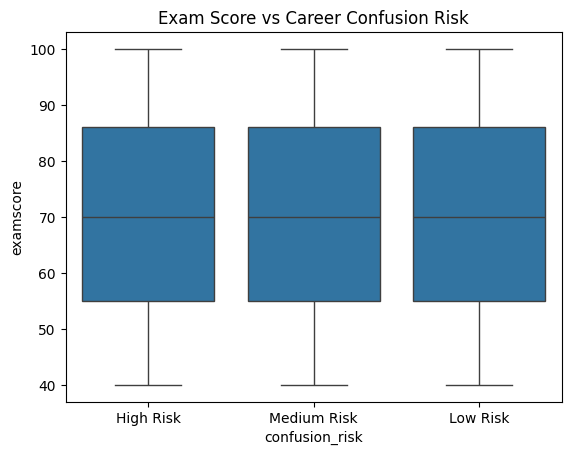

In [21]:
# Marks and Career clarity
sns.boxplot(x="confusion_risk", y="examscore", data=df)
plt.title("Exam Score vs Career Confusion Risk")
plt.show()


In [22]:
#Behavioural factors beat academic ones
impact_df = df.groupby("confusion_risk")[
    ["studyhours", "attendance", "assignmentcompletion", "stresslevel", "motivation"]
].mean()

impact_df


,studyhours,attendance,assignmentcompletion,stresslevel,motivation
confusion_risk,,,,,
High Risk,20.183908,80.963465,74.427340,1.323892,0.893678
Low Risk,19.739713,79.653270,74.377671,1.312281,0.904944
Medium Risk,20.115541,80.249783,74.609017,1.295593,0.913308


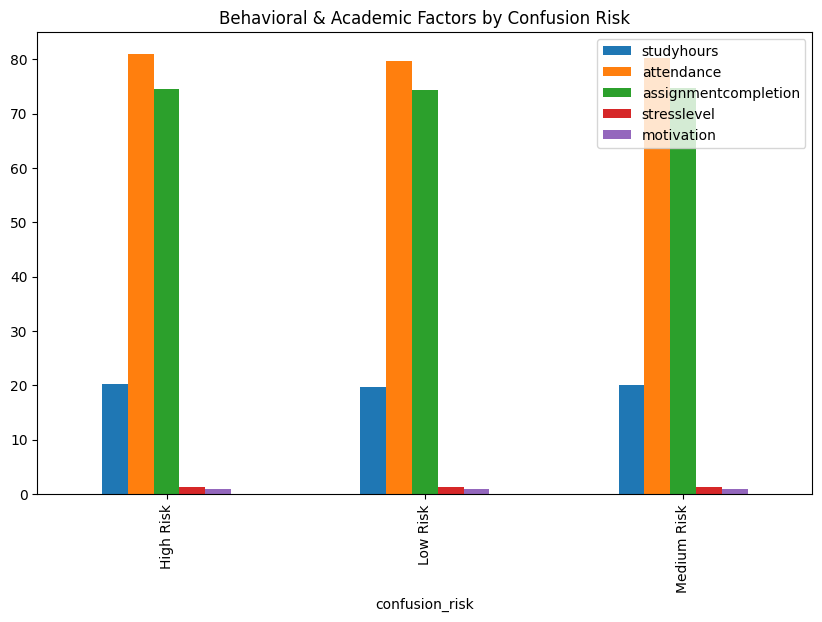

In [23]:
impact_df.plot(kind="bar", figsize=(10,6))
plt.title("Behavioral & Academic Factors by Confusion Risk")
plt.show()


In [24]:
#Silent Strugglers
silent_strugglers = df[
    (df["examscore"] >= 70) &
    (df["confusion_risk"] == "High Risk")
]

len(silent_strugglers)


1227

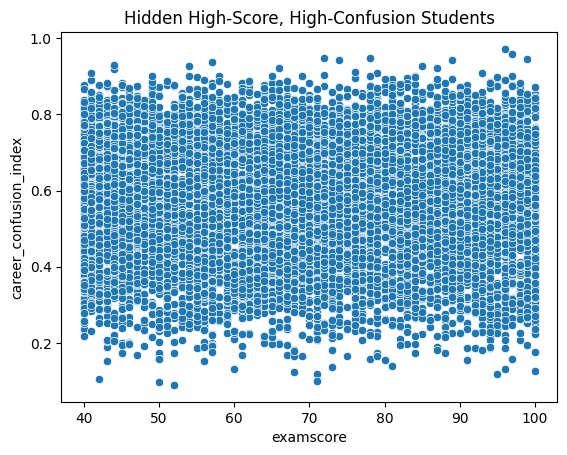

In [25]:
sns.scatterplot(
    x="examscore",
    y="career_confusion_index",
    data=df
)
plt.title("Hidden High-Score, High-Confusion Students")
plt.show()


In [26]:
#Student Profiling
def student_profile(row):
    if row["confusion_risk"] == "Low Risk" and row["motivation"] > 7:
        return "Focused Achievers"
    elif row["confusion_risk"] == "High Risk" and row["stresslevel"] > 7:
        return "Burnt-Out Strugglers"
    elif row["examscore"] > 70 and row["confusion_risk"] != "Low Risk":
        return "Silent Strugglers"
    else:
        return "Average Navigators"

df["student_profile"] = df.apply(student_profile, axis=1)
df["student_profile"].value_counts()


student_profile
Average Navigators    7865
Silent Strugglers     4604
Name: count, dtype: int64